### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification # to create sample data
from sklearn.model_selection import train_test_split # to split data into test and train
from sklearn.preprocessing import StandardScaler # to Standardize the data
from sklearn import linear_model # for comparing the results
from tqdm import tqdm
import matplotlib.pyplot as plt

### Preparing the Dataset

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementation of Logistic regression

In [3]:
class logistic_regression():
    def __init__(self, learning_rate, regularization_constant, verbose = True):
        self.learning_rate = learning_rate
        self.regularization_constant = regularization_constant
        self.weights = 0
        self.bais = 0
        self.verbose = verbose
        
    def log_loss(self, y_true, y_pred):
        return -1 * ((y_true)*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))
        
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def gradient_weights(self, weights, x, y, bais ):
        return (self.sigmoid(weights.dot(x) + bais) - y)*x
    
    def gradient_bais(self, weights, x, y, bais):
         return (self.sigmoid(weights.dot(x) + bais) - y)
        
    def fit(self, x_train, y_train, epoch): 
        weights = np.zeros(x_train.shape[1])
        bais = 0
        n = len(y_train)
        mean_error = []
        for _ in tqdm(range(epoch)):
            dw, db = 0, 0
            for x,y in zip(x_train, y_train):
                dw += self.gradient_weights(weights, x, y, bais)
                db += self.gradient_bais(weights, x, y, bais)
            weights = weights - self.learning_rate * ( dw + self.regularization_constant)
            bais = bais -  self.learning_rate * db
            if self.verbose == True:
                a = []
                for x,y in zip(x_train, y_train):
                    a.append(self.log_loss( y, self.sigmoid(weights.dot(x) + bais)))
                mean_error.append(sum(a)/len(a))    
        self.weights = weights
        self.bais = bais
        if self.verbose == True:
            return mean_error
    
    def predict(self, x_test):
        return self.sigmoid(self.weights.dot(x_test) + self.bais)


In [4]:
lr = logistic_regression(learning_rate = 0.00001, regularization_constant = 0.0001, verbose = True) 

In [5]:
 m = lr.fit(X_train, y_train, epoch = 40)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:40<00:00,  1.02s/it]


### Plotting the Log Loss after every epoch

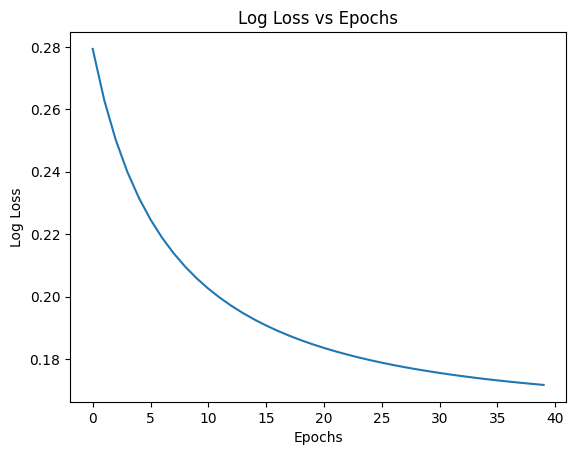

In [6]:
plt.plot(m)
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epochs')
plt.show()

### Performance on Test Data

In [7]:
a = []
for x,y_true in zip(X_test, y_test):
    y_pred =  lr.predict(x)
    loss = -1 * ((y_true)*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))
    a.append(loss)
print('Average Log Loss over the test Data =',sum(a)/len(a))

Average Log Loss over the test Data = 0.1720578667488857


### Comparing with Sklearns implementation

In [8]:
clf = linear_model.SGDClassifier(eta0=0.00001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, learning_rate='constant')

In [9]:
clf.fit(X_train, y_train)

SGDClassifier(eta0=1e-05, learning_rate='constant', loss='log', random_state=15)

In [11]:
a = []
predictions = clf.predict_proba(X_test)
for i,y_true in zip(predictions[:,1:], y_test): # getting the probabilities for class 1
    y_pred = i[0]
    loss = -1 * ((y_true)*np.log10(y_pred) + (1-y_true)*np.log10(1-y_pred))
    a.append(loss)
print('Average Log Loss over the test Data =',sum(a)/len(a))

Average Log Loss over the test Data = 0.17205253159713674
